# Computer Vision with PyTorch

In this notebook we will use a subset dataset from the popular Food101 Dataset.

We're going to use 4 different classes:

1. Sushi
2. Cup-Cakes
3. Macarons
4. Chocolate Cake

## 2. Get Data

In [ ]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+ is required for this video
torch.__version__

'2.6.0+cu124'

In [ ]:
torch.cuda.is_available()

True

### Setup Device Agnostic Code


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import requests # this library is used to make requests over the internet (HTTP Connection)
import zipfile # import zipfile will help you unzip .zip files
from pathlib import Path
import os

# Setup data path
data_path = Path("data/")
image_path = data_path / "food_images"

# If the image folder doesn't exist, download it and parepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists, skipping download.")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download the data zip file
with open(data_path / "food_images.zip", "wb") as f:
    request = requests.get("https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/image_classification_dataset.zip")
    print("Downloading food images data....")
    f.write(request.content)

# Unzip data file .zip
with zipfile.ZipFile(data_path / "food_images.zip", "r") as zip_ref:
    print("Unzipping food images .zip file...")
    zip_ref.extractall(image_path)

data/food_images does not exist, creating one...
Unzipping food images .zip file...


In [ ]:
os.remove("/content/data/food_images.zip")

Nice!

Now we have gotten a dataset in our environement successfully in the `Standard Image Classification Format`

`data -> food_images -> dataset -> train -> class_a, class_b, class_c`

`data -> food_images -> dataset -> test -> class_a, class_b, class_c`

In [ ]:
image_path

PosixPath('data/food_images')

In [ ]:
# Setup directory paths
train_dir = image_path / "dataset/train"
test_dir = image_path / "dataset/test"

In [ ]:
train_dir

PosixPath('data/food_images/dataset/train')

In [ ]:
test_dir

PosixPath('data/food_images/dataset/test')

## 2. Becoming one with the data (data preperation and data exploartion)

In [ ]:
for dirpath, dirnames, filenames in list(os.walk(data_path)):
    print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")

There are 1 directories and 0 in 'data'
There are 1 directories and 0 in 'data/food_images'
There are 2 directories and 0 in 'data/food_images/dataset'
There are 4 directories and 0 in 'data/food_images/dataset/train'
There are 0 directories and 250 in 'data/food_images/dataset/train/sushi'
There are 0 directories and 250 in 'data/food_images/dataset/train/cup_cakes'
There are 0 directories and 250 in 'data/food_images/dataset/train/chocolate_cake'
There are 0 directories and 250 in 'data/food_images/dataset/train/macarons'
There are 4 directories and 0 in 'data/food_images/dataset/test'
There are 0 directories and 75 in 'data/food_images/dataset/test/sushi'
There are 0 directories and 75 in 'data/food_images/dataset/test/cup_cakes'
There are 0 directories and 75 in 'data/food_images/dataset/test/chocolate_cake'
There are 0 directories and 75 in 'data/food_images/dataset/test/macarons'


In [ ]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(image_path)

There are 1 directories and 0 images in 'data/food_images'
There are 2 directories and 0 images in 'data/food_images/dataset'
There are 4 directories and 0 images in 'data/food_images/dataset/train'
There are 0 directories and 250 images in 'data/food_images/dataset/train/sushi'
There are 0 directories and 250 images in 'data/food_images/dataset/train/cup_cakes'
There are 0 directories and 250 images in 'data/food_images/dataset/train/chocolate_cake'
There are 0 directories and 250 images in 'data/food_images/dataset/train/macarons'
There are 4 directories and 0 images in 'data/food_images/dataset/test'
There are 0 directories and 75 images in 'data/food_images/dataset/test/sushi'
There are 0 directories and 75 images in 'data/food_images/dataset/test/cup_cakes'
There are 0 directories and 75 images in 'data/food_images/dataset/test/chocolate_cake'
There are 0 directories and 75 images in 'data/food_images/dataset/test/macarons'


In [ ]:
train_dir

PosixPath('data/food_images/dataset/train')

In [ ]:
test_dir

PosixPath('data/food_images/dataset/test')

In [ ]:
image_path

PosixPath('data/food_images')

Random image path: data/food_images/dataset/train/macarons/2915855.jpg
Image class: macarons
Image height: 512
Image width: 512


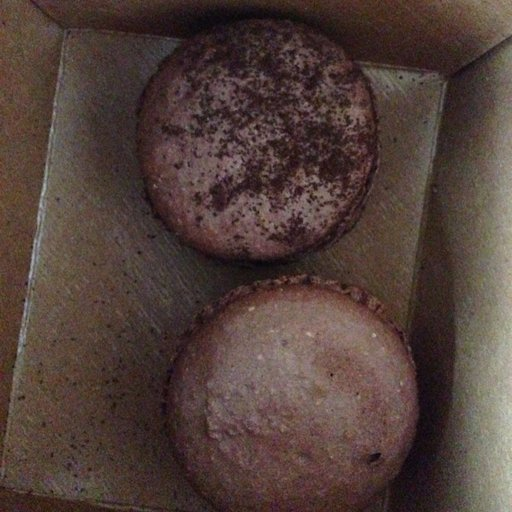

In [ ]:
import random
from PIL import Image

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*/*.jpg"))

# 2. Pick a random image image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

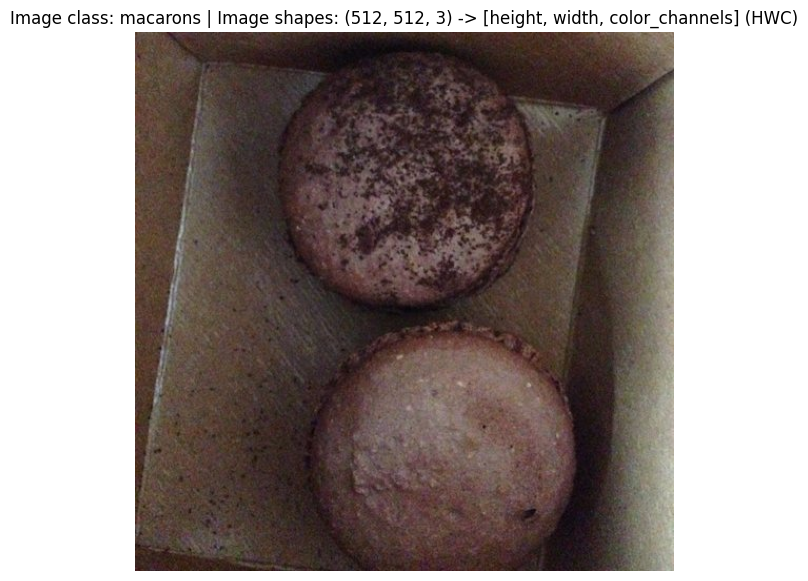

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # for visuslization in python

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shapes: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis("off")
plt.show()

array([[[ 93,  70,  52],
        [ 80,  57,  39],
        [ 98,  77,  60],
        ...,
        [148, 131, 111],
        [137, 118, 101],
        [151, 132, 115]],

       [[ 89,  66,  50],
        [ 76,  55,  38],
        [ 95,  74,  57],
        ...,
        [156, 139, 119],
        [138, 119, 102],
        [133, 114,  97]],

       [[ 92,  70,  56],
        [ 80,  58,  44],
        [ 95,  73,  59],
        ...,
        [157, 142, 123],
        [148, 131, 113],
        [133, 116,  98]],

       ...,

       [[ 82,  48,  49],
        [ 75,  43,  44],
        [ 65,  34,  32],
        ...,
        [167, 170, 153],
        [175, 173, 158],
        [173, 170, 155]],

       [[ 61,  25,  27],
        [ 63,  29,  30],
        [ 61,  27,  26],
        ...,
        [166, 168, 154],
        [174, 172, 157],
        [173, 171, 156]],

       [[ 60,  24,  26],
        [ 69,  33,  35],
        [ 72,  38,  37],
        ...,
        [155, 157, 143],
        [168, 169, 153],
        [177, 175, 160]]], dtype=uint8)
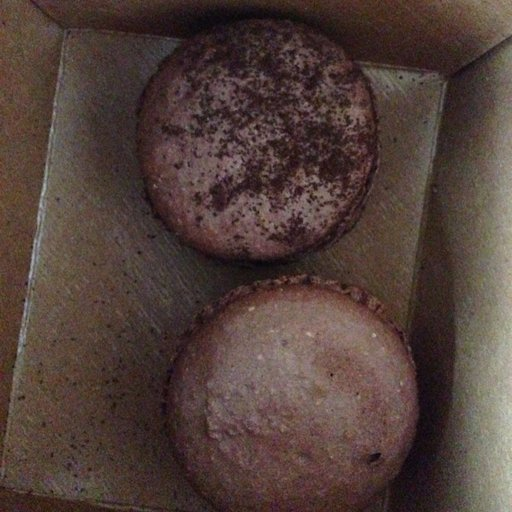

In [ ]:
 img_as_array

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn our target data into tensors (in our case, numerical representation of our images)
2. Turn it into `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` we'll call these two `Dataset` and `DataLoader`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal axis
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(degrees=180),
    # Turn the image into a torch.tensor
    transforms.ToTensor()
])

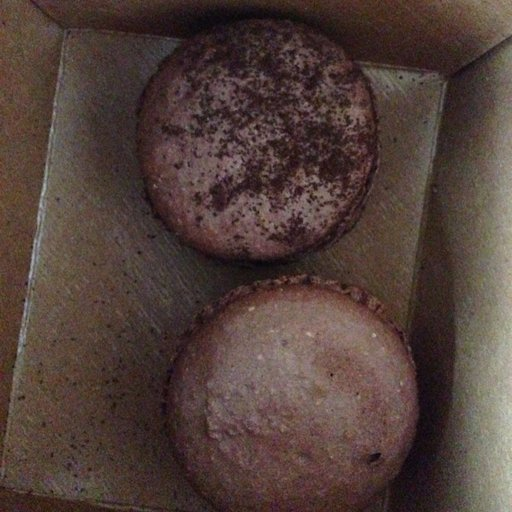

In [ ]:
img

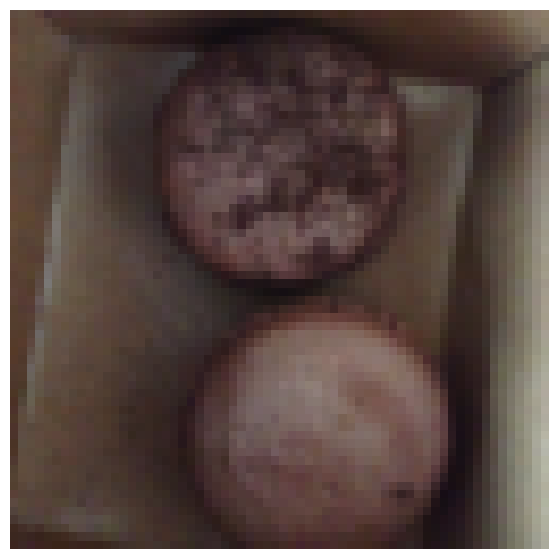

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(data_transform(img).permute(1, 2, 0))
plt.axis("off")
plt.show()

In [ ]:
data_transform(img)

tensor([[[0.5490, 0.5412, 0.5255,  ..., 0.3765, 0.3765, 0.3725],
         [0.5294, 0.5294, 0.5020,  ..., 0.3725, 0.3725, 0.3725],
         [0.5216, 0.4902, 0.4549,  ..., 0.3569, 0.3725, 0.3686],
         ...,
         [0.6863, 0.6353, 0.5765,  ..., 0.2784, 0.2627, 0.2431],
         [0.6745, 0.6196, 0.5569,  ..., 0.2235, 0.2314, 0.2314],
         [0.6667, 0.6157, 0.5490,  ..., 0.2431, 0.2353, 0.2353]],

        [[0.4902, 0.4667, 0.4549,  ..., 0.2941, 0.3098, 0.2941],
         [0.4745, 0.4706, 0.4510,  ..., 0.2902, 0.2980, 0.2784],
         [0.4667, 0.4392, 0.4078,  ..., 0.2902, 0.2941, 0.2667],
         ...,
         [0.6863, 0.6275, 0.5569,  ..., 0.2078, 0.1804, 0.1608],
         [0.6706, 0.6235, 0.5569,  ..., 0.1451, 0.1569, 0.1529],
         [0.6667, 0.6118, 0.5490,  ..., 0.1373, 0.1569, 0.1451]],

        [[0.4118, 0.4078, 0.4000,  ..., 0.2392, 0.2549, 0.2510],
         [0.3843, 0.4000, 0.3882,  ..., 0.2353, 0.2314, 0.2235],
         [0.3961, 0.3725, 0.3451,  ..., 0.2353, 0.2353, 0.

In [ ]:
image_path_list

[PosixPath('data/food_images/dataset/train/sushi/838721.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/1742201.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/3494950.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/618419.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/684266.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/274744.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/3803301.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/511665.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/705150.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/1595206.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/719108.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/3268416.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/3429826.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/1485536.jpg'),
 PosixPath('data/food_images/dataset/train/sushi/964994.jpg'),
 PosixPath('data/food_images/dataset/train/sushi

In [ ]:
random.sample(image_path_list, k=10)

[PosixPath('data/food_images/dataset/test/macarons/1680225.jpg'),
 PosixPath('data/food_images/dataset/test/macarons/1342532.jpg'),
 PosixPath('data/food_images/dataset/train/cup_cakes/91387.jpg'),
 PosixPath('data/food_images/dataset/train/macarons/1509967.jpg'),
 PosixPath('data/food_images/dataset/train/chocolate_cake/2721988.jpg'),
 PosixPath('data/food_images/dataset/train/macarons/1053364.jpg'),
 PosixPath('data/food_images/dataset/test/chocolate_cake/901472.jpg'),
 PosixPath('data/food_images/dataset/train/chocolate_cake/2144647.jpg'),
 PosixPath('data/food_images/dataset/train/cup_cakes/54293.jpg'),
 PosixPath('data/food_images/dataset/train/macarons/2090903.jpg')]

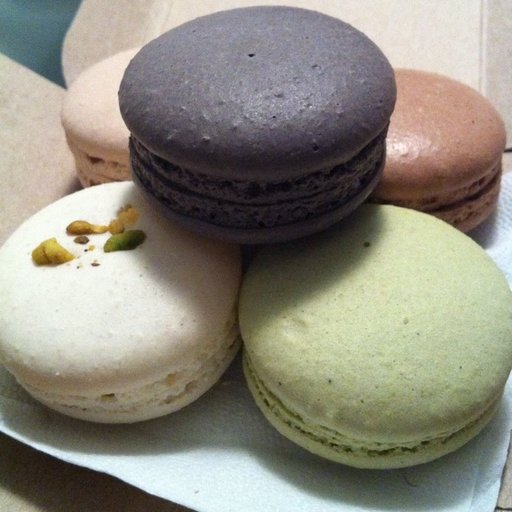

In [ ]:
Image.open(random.choice(image_path_list))

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):

    """
    Selects random images from a path of images and loads/transforms them
    then plots the original vs the transformed version.
    """

    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

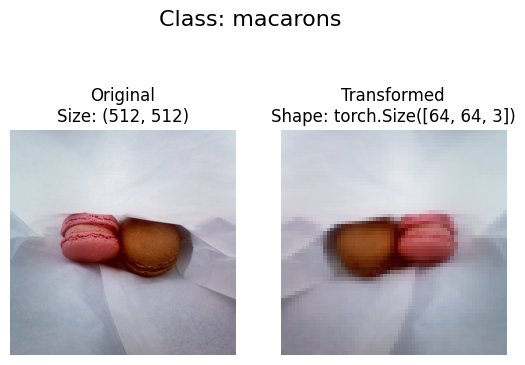

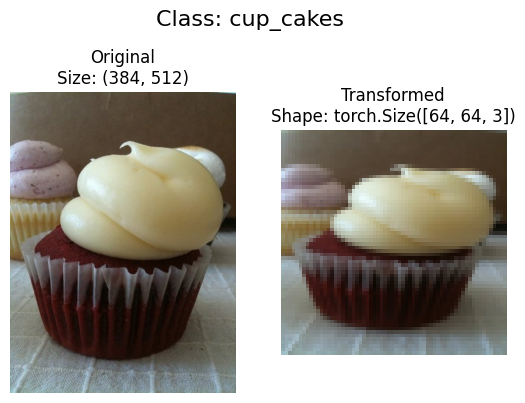

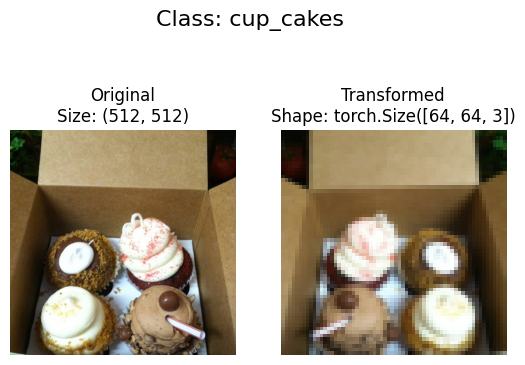

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Loading Image Data using Image Folder

In [ ]:
train_dir

PosixPath('data/food_images/dataset/train')

In [ ]:
test_dir

PosixPath('data/food_images/dataset/test')

In [ ]:
data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [ ]:
# Use ImageFolder to create datasets

from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, # Fetch images form inside folders
                                  transform=data_transform,
                                  target_transform=None) # we don't want to transform the targets of our images

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: data/food_images/dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 300
    Root location: data/food_images/dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
train_data[0]

(tensor([[[0.9647, 0.9647, 0.9647,  ..., 0.9020, 0.4510, 0.1961],
          [0.9647, 0.9647, 0.9647,  ..., 0.9608, 0.7569, 0.3176],
          [0.9647, 0.9647, 0.9647,  ..., 0.9686, 0.9412, 0.6471],
          ...,
          [0.9647, 0.9647, 0.9647,  ..., 0.1098, 0.1137, 0.1098],
          [0.9647, 0.9647, 0.9647,  ..., 0.1098, 0.1059, 0.1059],
          [0.9647, 0.9647, 0.9647,  ..., 0.1176, 0.1020, 0.0980]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.9020, 0.4627, 0.1961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9647, 0.7647, 0.3216],
          [1.0000, 1.0000, 1.0000,  ..., 0.9686, 0.9451, 0.6471],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.1176, 0.1137, 0.1020],
          [1.0000, 1.0000, 1.0000,  ..., 0.1137, 0.1020, 0.1020],
          [1.0000, 1.0000, 1.0000,  ..., 0.1176, 0.0980, 0.0941]],
 
         [[0.9882, 0.9882, 0.9882,  ..., 0.8863, 0.4824, 0.2314],
          [0.9882, 0.9882, 0.9882,  ..., 0.9255, 0.7490, 0.3412],
          [0.9882, 0.9882, 0.9804,  ...,

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['chocolate_cake', 'cup_cakes', 'macarons', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'chocolate_cake': 0, 'cup_cakes': 1, 'macarons': 2, 'sushi': 3}

In [ ]:
# Check the lengts of our dataset
len(train_data), len(test_data)

(1000, 300)

In [ ]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
test_data.classes

['chocolate_cake', 'cup_cakes', 'macarons', 'sushi']

In [ ]:
image, label = train_data[0][0], train_data[0][1]

In [ ]:
image

tensor([[[0.1961, 0.4510, 0.9020,  ..., 0.9647, 0.9647, 0.9647],
         [0.3176, 0.7569, 0.9608,  ..., 0.9647, 0.9647, 0.9647],
         [0.6471, 0.9412, 0.9686,  ..., 0.9647, 0.9647, 0.9647],
         ...,
         [0.1098, 0.1137, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
         [0.1059, 0.1059, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
         [0.0980, 0.1020, 0.1176,  ..., 0.9647, 0.9647, 0.9647]],

        [[0.1961, 0.4627, 0.9020,  ..., 1.0000, 1.0000, 1.0000],
         [0.3216, 0.7647, 0.9647,  ..., 1.0000, 1.0000, 1.0000],
         [0.6471, 0.9451, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1020, 0.1137, 0.1176,  ..., 1.0000, 1.0000, 1.0000],
         [0.1020, 0.1020, 0.1137,  ..., 1.0000, 1.0000, 1.0000],
         [0.0941, 0.0980, 0.1176,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.2314, 0.4824, 0.8863,  ..., 0.9882, 0.9882, 0.9882],
         [0.3412, 0.7490, 0.9255,  ..., 0.9882, 0.9882, 0.9882],
         [0.6510, 0.9098, 0.9216,  ..., 0.9804, 0.9882, 0.

In [ ]:
label

0

In [ ]:
print(f"Image tensor:\n {image}")
print(f"Image shape: {image.shape}")
print(f"Image datatype: {image.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1961, 0.4510, 0.9020,  ..., 0.9647, 0.9647, 0.9647],
         [0.3176, 0.7569, 0.9608,  ..., 0.9647, 0.9647, 0.9647],
         [0.6471, 0.9412, 0.9686,  ..., 0.9647, 0.9647, 0.9647],
         ...,
         [0.1098, 0.1137, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
         [0.1059, 0.1059, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
         [0.0980, 0.1020, 0.1176,  ..., 0.9647, 0.9647, 0.9647]],

        [[0.1961, 0.4627, 0.9020,  ..., 1.0000, 1.0000, 1.0000],
         [0.3216, 0.7647, 0.9647,  ..., 1.0000, 1.0000, 1.0000],
         [0.6471, 0.9451, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1020, 0.1137, 0.1176,  ..., 1.0000, 1.0000, 1.0000],
         [0.1020, 0.1020, 0.1137,  ..., 1.0000, 1.0000, 1.0000],
         [0.0941, 0.0980, 0.1176,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.2314, 0.4824, 0.8863,  ..., 0.9882, 0.9882, 0.9882],
         [0.3412, 0.7490, 0.9255,  ..., 0.9882, 0.9882, 0.9882],
         [0.6510, 0.9098, 0.9216,  ..., 0.9

In [ ]:
class_names[label]

'chocolate_cake'

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


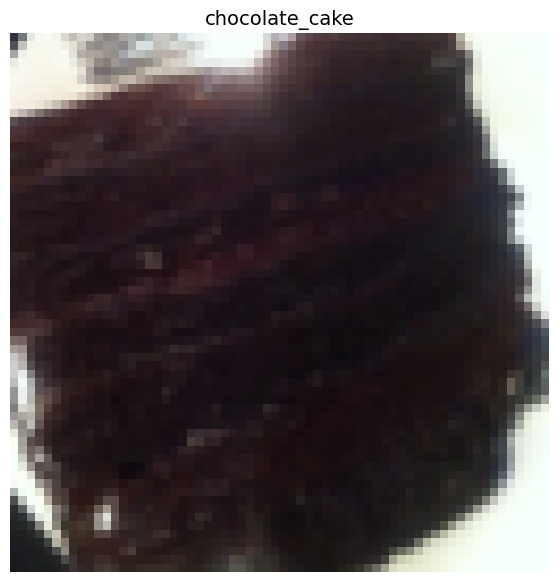

In [ ]:
# Rearrange the order of dimensions
img_permute = image.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {image.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## 4.1 turn loaded images into `DataLoaders`

In [ ]:
!nvidia-smi

Sat Jun 28 18:32:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   43C    P8             16W /   72W |       3MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
os.cpu_count()

12

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1 # Batch size is 32 (YOU CAN CHANGE THIS TO WHATEVER YOU WANT)

NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fa1f21c3590>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa1f2c26090>)

In [ ]:
train_dataloader

In [ ]:
test_dataloader

In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

print(f"Image shape: {img_batch.shape} -> [batch_size, color_channels, height, width]")
print(f"Label batch shape: {label_batch.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label batch shape: torch.Size([32])


In [ ]:
label_batch

tensor([2, 3, 0, 1, 2, 1, 1, 3, 1, 3, 0, 0, 1, 3, 3, 3, 0, 0, 3, 2, 2, 3, 2, 3,
        1, 1, 0, 2, 2, 1, 3, 0])

In [ ]:
test_image_batch, test_label_batch = next(iter(test_dataloader))

In [ ]:
test_label_batch

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

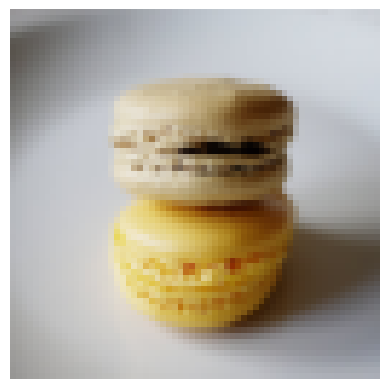

In [ ]:
plt.imshow(img_batch[0].permute(1, 2, 0))
plt.axis("off")
plt.show()

In [ ]:
from typing import List, Tuple, Dict

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 1. Adjust display if n is too high
    if n > 5:
        n = 10
        display_shape = False
        classes = False
        print(f"For display puporses, n shouldn't be larger than 10, setting to 10 and removing shape display")

    # 2. Set the seed
    if seed:
        random.seed(seed)

    # 3. Get rnadom sample indexes
    random_sample_idx = random.sample(range(len(dataset)), k=n)

    # 4. Setup plot
    plt.figure(figsize=(16, 8))

    # 5. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_sample_idx):
        targ_sample, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 6. Adjust tensor dimensions for plotting
        targ_image_adjust = targ_sample.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")

        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nShape: {targ_image_adjust.shape}"
        plt.title(title)

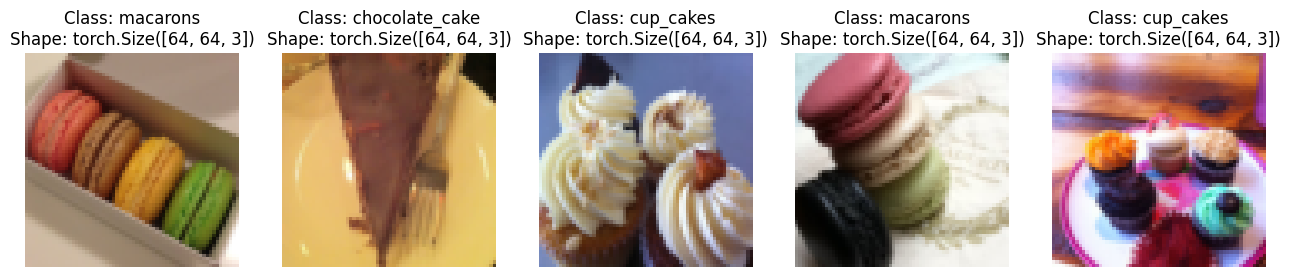

In [ ]:
# Call the function and plot random images
display_random_images(dataset=train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

## 5. Building a computer vision model - image classification model (TinyVGG Architecture)

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying the TinyVGG from CNN Explainer.
    """

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:

        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=(3, 3), # (1x1) (5x5) (7x7) (10x10)
                      stride=(1, 1), # 2
                      padding=0), # (0 - valid) (1 - padding) (2 - output shape > input_shape)
            nn.ReLU(), # learn complex non-linear relationships,
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=0),
            nn.ReLU(),
            # Max Pool helps us reduce overfitting
            # Max pool helps us make the processing and computing faster
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2)) # default stride value is same as kernel_sie
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(), # flatten the feature map matrix into a feature vector (1D) to be able to pass into the linear layer and classify
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


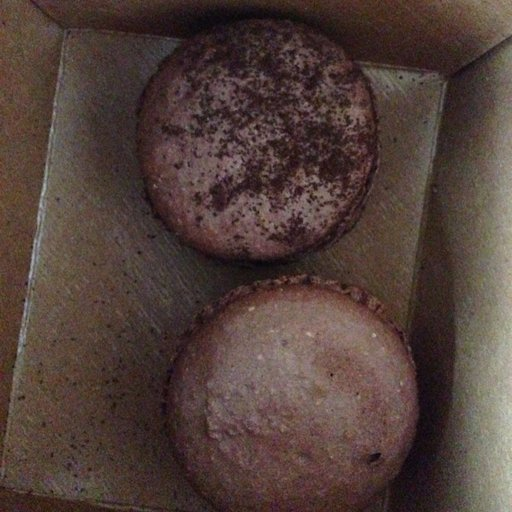

In [ ]:
img

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [ ]:
len(class_names)

4

In [ ]:
device

'cuda'

In [ ]:
# Instatiating a new instance of the TinyVGG model

torch.manual_seed(42)

model = TinyVGG(input_shape=3, # number of color channels in our image data
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

## 5.1 Try a dummy forward pass by passing a single image

In [ ]:
# Get a single image batch and label batch
image_batch, label_batch = next(iter(train_dataloader))

image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
image_batch.shape

torch.Size([32, 3, 64, 64])

In [ ]:
label_batch

tensor([2, 2, 0, 1, 0, 3, 0, 3, 3, 0, 1, 2, 0, 0, 1, 1, 1, 3, 1, 3, 1, 0, 1, 2,
        0, 2, 1, 1, 3, 2, 3, 3])

In [ ]:
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

In [ ]:
image_batch.device

device(type='cpu')

In [ ]:
image_batch.shape

torch.Size([32, 3, 64, 64])

In [ ]:
# Try a forward pass
logits = model(image_batch.to(device))

In [ ]:
logits.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')

### 5.2 Use `torchinfo` to get an idea of the shapes going through the model

In [ ]:
try:
    import torchinfo
except:
    !pip install -q torchinfo
    import torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
model(image_batch[0].unsqueeze(dim=0).to(device))

tensor([[-0.0011,  0.0209,  0.0437, -0.0150]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
summary(model=model,
        input_size=[1, 3, 64, 64]) # an example of the input image shape

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 4]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 6. Creating a training loop and testing loop to train and evaluate our model

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

    """
    This function will train a model on the dataloader
    and optimizes the model's paramters to better represent our data.
    """

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy value
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):

        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X) # outputs raw scores (logits)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # Accumulate the train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Apply backpropgation algorithm
        loss.backward()

        # 5. Optimizer step (Gradient Descent Algorithm)
        optimizer.step() # to improve the weights and biases of the model

        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    # Put model in eval mode
    model.eval()

    # Setup the test loss and test accuracy values
    test_loss , test_acc = 0, 0

    # Turn on inference mode
    with torch.inference_mode():

        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):

            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calcualte the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # 3. Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

        # Adjust metrics to get average loss and accuracy per batch
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)


        return test_loss, test_acc

### Creating a function `train()` to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm
# Combine train_step() and test_step() both and calls them toghether in one hit
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5, # 5 epochs be default
          device=device):

    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

        # Update the results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results



In [ ]:
class_names

['chocolate_cake', 'cup_cakes', 'macarons', 'sushi']

In [ ]:
# Set random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model = TinyVGG(input_shape=3,
                hidden_units=32,
                output_shape=len(class_names)).to(device)


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # we are dealing with multi class classification

optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train the model

model_results = train(model=model,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.3906 | Train acc: 0.2450 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 1 | Train Loss: 1.3870 | Train acc: 0.2450 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 2 | Train Loss: 1.3871 | Train acc: 0.2310 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 3 | Train Loss: 1.3870 | Train acc: 0.2400 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 4 | Train Loss: 1.3870 | Train acc: 0.2370 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 5 | Train Loss: 1.3871 | Train acc: 0.2230 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 6 | Train Loss: 1.3871 | Train acc: 0.2360 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 7 | Train Loss: 1.3871 | Train acc: 0.2370 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 8 | Train Loss: 1.3871 | Train acc: 0.2210 | Test loss: 1.3863 | test_acc: 0.2500
Epoch: 9 | Train Loss: 1.3871 | Train acc: 0.2450 | Test loss: 1.3863 | test_acc: 0.2500
Total training time: 46.740 seconds


In [ ]:
Epoch: 9 | Train Loss: 0.9759 | Train acc: 0.5957 | Test loss: 1.3401 | test_acc: 0.4344


In [ ]:
model_results

{'train_loss': [1.3772352449595928,
  1.256299164146185,
  1.1857238076627254,
  1.1587822660803795,
  1.140702372416854,
  1.1112669184803963,
  1.0859699491411448,
  1.0428668186068535,
  1.0148798320442438,
  0.9758515190333128],
 'train_acc': [0.2568359375,
  0.4345703125,
  0.458984375,
  0.4765625,
  0.4873046875,
  0.501953125,
  0.5166015625,
  0.5322265625,
  0.556640625,
  0.595703125],
 'test_loss': [1.3163885474205017,
  1.256690752506256,
  1.2363533675670624,
  1.2253033339977264,
  1.2086115717887878,
  1.256368523836136,
  1.1882298469543457,
  1.242794394493103,
  1.2394526064395905,
  1.3400902271270752],
 'test_acc': [0.3729166666666667,
  0.38541666666666663,
  0.4135416666666667,
  0.4239583333333333,
  0.4697916666666667,
  0.478125,
  0.5052083333333333,
  0.4666666666666667,
  0.4822916666666667,
  0.434375]}

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

    """Plots training curves of a results dicitionary."""


    # Get the loss values of the results dictioary (traininig and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictioanay (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("Accuracy %")
    plt.xlabel("Epochs")
    plt.legend()

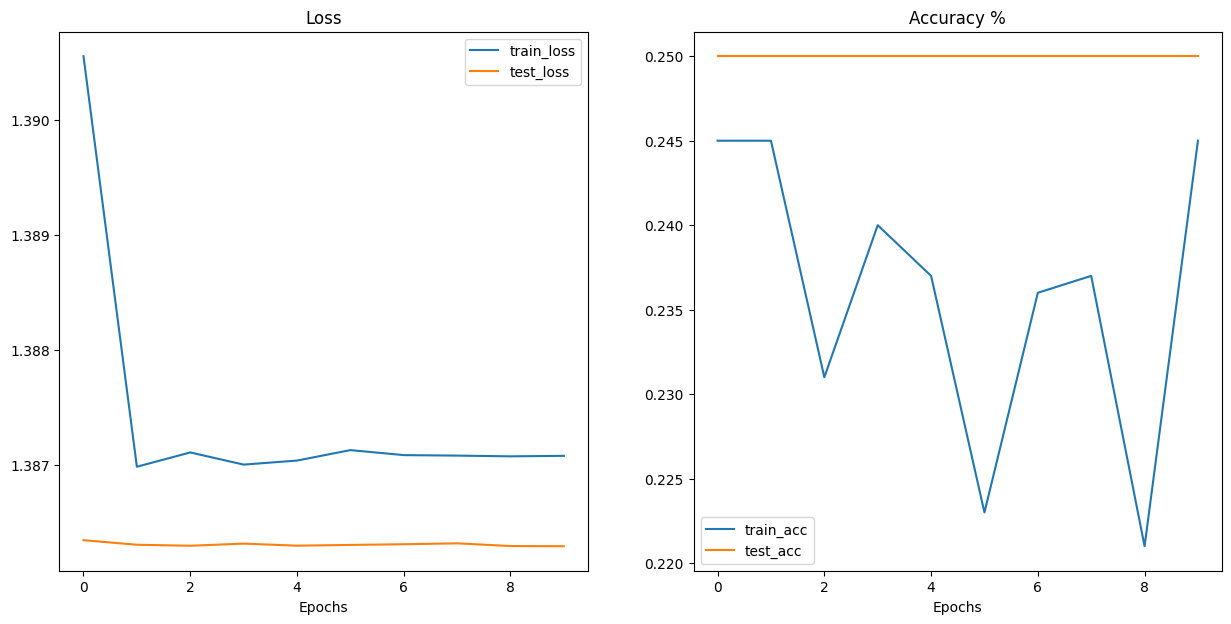

In [ ]:
plot_loss_curves(model_results)